In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

2024-04-22 16:14:47.762379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 16:14:47.762507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 16:14:47.900871: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
classes_to_include = [0, 1, 2, 3, 4]

In [5]:
train_mask = np.isin(y_train, classes_to_include).flatten()
test_mask = np.isin(y_test, classes_to_include).flatten()

In [6]:
x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
y_train

array([[4],
       [1],
       [1],
       ...,
       [2],
       [1],
       [1]], dtype=uint8)

In [9]:
y_train, y_test = to_categorical(y_train, num_classes=len(classes_to_include)), to_categorical(y_test, num_classes=len(classes_to_include))

In [10]:
y_train

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [11]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, add, Flatten, Dense

In [12]:
def createCNNModel(num_of_classes, input_shape):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
    model.add(BatchNormalization())
    #pooling
    model.add(MaxPool2D(pool_size=2, strides=2))
    #dropout
    model.add(Dropout(0.2))

    #Stack 2
    #convolution
    model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
    model.add(BatchNormalization())
    #pooling
    model.add(MaxPool2D(pool_size=3, strides=2))
    #dropout
    model.add(Dropout(0.5))

    #Stack 3
    #convolution
    model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
    model.add(BatchNormalization())
    #pooling
    model.add(MaxPool2D(pool_size=2, strides=2))
    #dropout
    model.add(Dropout(0.5))

    #flattening
    model.add(Flatten())

    #full connection
    model.add(Dense(units=512, activation="relu"))
    #dropout
    model.add(Dropout(0.5))

    #full connection
    model.add(Dense(units=512, activation="relu"))
    #dropout
    model.add(Dropout(0.5))

    #output layer
    model.add(Dense(units=num_of_classes, activation="softmax"))
    
    return model


In [13]:
model = createCNNModel(num_of_classes=5, input_shape = (32,32,3))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,137,861 (4.34 MB)

 Trainable params: 1,137,413 (4.34 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
history = model.fit(x_train, y_train, epochs=60, validation_data=(x_test, y_test))

Epoch 1/60
 24/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2180 - loss: 3.7265 

I0000 00:00:1713802520.825798      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713802520.848123      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3775 - loss: 1.7314

W0000 00:00:1713802534.259687      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713802535.283330      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.3776 - loss: 1.7309 - val_accuracy: 0.5428 - val_loss: 1.1756
Epoch 2/60
 27/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5632 - loss: 1.0112

W0000 00:00:1713802536.115157      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5778 - loss: 1.0305 - val_accuracy: 0.4988 - val_loss: 1.3752
Epoch 3/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6546 - loss: 0.8964 - val_accuracy: 0.4732 - val_loss: 1.4561
Epoch 4/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6936 - loss: 0.8027 - val_accuracy: 0.7360 - val_loss: 0.7115
Epoch 5/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7239 - loss: 0.7310 - val_accuracy: 0.7320 - val_loss: 0.7151
Epoch 6/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7475 - loss: 0.6864 - val_accuracy: 0.6966 - val_loss: 0.8025
Epoch 7/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7690 - loss: 0.6392 - val_accuracy: 0.7658 - val_loss: 0.6032
Epoch 8/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7787 - loss: 0.6026 - val_accuracy: 0.7964 - val_loss: 0.5633
Epoch 9/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7882 - loss: 0.5867 - val_accuracy: 0.8128 - val_

In [17]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history['loss']


  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']


  epochs = range(len(history.history['loss']))
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='validation_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

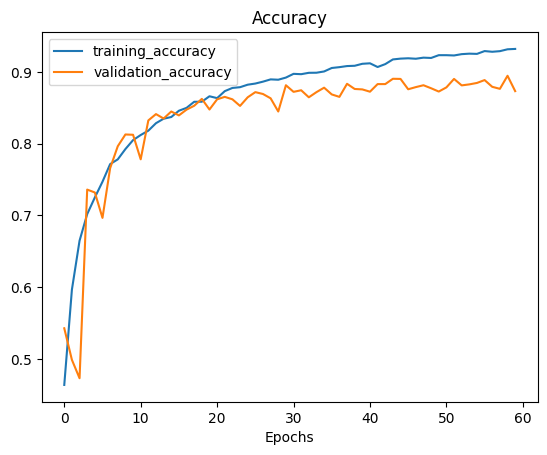

In [18]:
plot_loss_curves(history)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(horizontal_flip = True)
test_datagen = ImageDataGenerator()

In [21]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
validation_generator = test_datagen.flow(x_test, y_test, batch_size=32)

In [22]:
another_model = createCNNModel(num_of_classes=5, input_shape = (32,32,3))

In [23]:
another_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = another_model.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 25/782 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2185 - loss: 3.7154 

W0000 00:00:1713802771.376174      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


699/782 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3709 - loss: 1.7575

W0000 00:00:1713802783.413616      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3801 - loss: 1.7163

W0000 00:00:1713802784.863900      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.3811 - loss: 1.7122 - val_accuracy: 0.5918 - val_loss: 1.0209
Epoch 2/50
 19/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5829 - loss: 0.9952

W0000 00:00:1713802785.772225      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6063 - loss: 0.9923 - val_accuracy: 0.5978 - val_loss: 0.9574
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6604 - loss: 0.8692 - val_accuracy: 0.6872 - val_loss: 0.8218
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7085 - loss: 0.7774 - val_accuracy: 0.7404 - val_loss: 0.6815
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7340 - loss: 0.7296 - val_accuracy: 0.7622 - val_loss: 0.6232
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7489 - loss: 0.6822 - val_accuracy: 0.8032 - val_loss: 0.5404
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7651 - loss: 0.6297 - val_accuracy: 0.7888 - val_loss: 0.5651
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7795 - loss: 0.6147 - val_accuracy: 0.7944 - val_loss: 0.5616
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7951 - loss: 0.5738 - val_accuracy: 0.8058 - val_

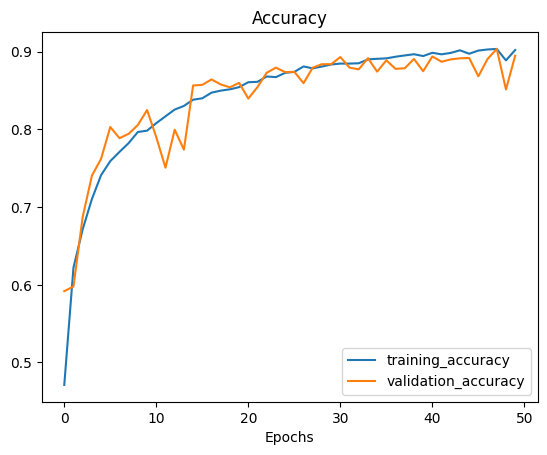

In [25]:
plot_loss_curves(history)

In [26]:
!mkdir -p saved_model
another_model.save('saved_model/Modelv1_Augmented_Images.h5')

In [27]:
loaded_model = tf.keras.models.load_model('saved_model/Modelv1_Augmented_Images.h5')

In [28]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,137,863 (4.34 MB)

 Trainable params: 1,137,413 (4.34 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

In [29]:
loss, accuracy = loaded_model.evaluate(validation_generator)
print('Restored model, accuracy: {:5.2f}%'.format(100 * accuracy))

 55/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8955 - loss: 0.3024

W0000 00:00:1713802986.856770      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8952 - loss: 0.2951
Restored model, accuracy: 89.50%


W0000 00:00:1713802987.680063      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Number of Classes = 7

In [30]:
classes_to_include = [0, 1, 2, 3, 4, 5, 6]

In [31]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

train_mask = np.isin(y_train, classes_to_include).flatten()
test_mask = np.isin(y_test, classes_to_include).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train, y_test = to_categorical(y_train, num_classes=len(classes_to_include)), to_categorical(y_test, num_classes=len(classes_to_include))

In [32]:
train_datagen = ImageDataGenerator(horizontal_flip = True)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
validation_generator = test_datagen.flow(x_test, y_test, batch_size=32)

In [33]:
class_seven_model = createCNNModel(num_of_classes=7, input_shape = (32,32,3))

class_seven_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,138,887 (4.34 MB)

 Trainable params: 1,138,439 (4.34 MB)

 Non-trainable params: 448 (1.75 KB)

In [34]:
class_seven_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=3,          # Number of epochs with no improvement after which training will be stopped
                               verbose=1,           # Print messages about early stopping
                               restore_best_weights=True)

In [36]:
history = class_seven_model.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
  25/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1589 - loss: 4.2944 

W0000 00:00:1713803002.153599      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 126/1094 ━━━━━━━━━━━━━━━━━━━━ 1:24 88ms/step - accuracy: 0.1817 - loss: 3.1212

W0000 00:00:1713803012.952178      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1087/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3172 - loss: 1.9619

W0000 00:00:1713803018.487839      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.3178 - loss: 1.9590 - val_accuracy: 0.5233 - val_loss: 1.2414
Epoch 2/50
  19/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5062 - loss: 1.2393

W0000 00:00:1713803019.657560      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5115 - loss: 1.2649 - val_accuracy: 0.5924 - val_loss: 1.0585
Epoch 3/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5788 - loss: 1.1382 - val_accuracy: 0.6753 - val_loss: 0.9081
Epoch 4/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6343 - loss: 1.0058 - val_accuracy: 0.7096 - val_loss: 0.7949
Epoch 5/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6586 - loss: 0.9398 - val_accuracy: 0.7174 - val_loss: 0.7834
Epoch 6/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6971 - loss: 0.8629 - val_accuracy: 0.7031 - val_loss: 0.8386
Epoch 7/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6994 - loss: 0.8465 - val_accuracy: 0.7343 - val_loss: 0.7588
Epoch 8/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7205 - loss: 0.7959 - val_accuracy: 0.7269 - val_loss: 0.7584
Epoch 9/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7295 - loss: 0.7666 - val_accurac

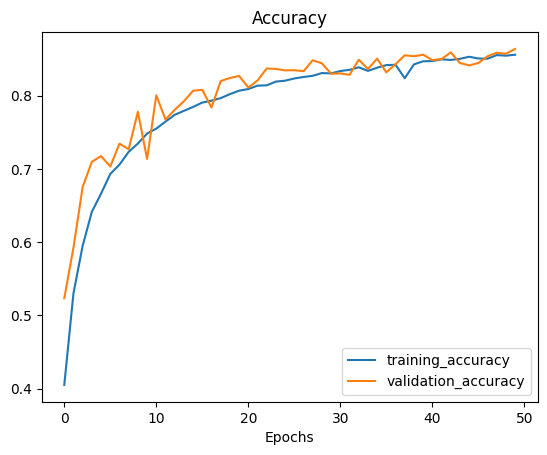

In [37]:
plot_loss_curves(history)